In [1]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
Note: you may need to restart the kernel to use updated packages.
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=521006 sha256=93256b4bbb181e7cfadca049652bdce108c861b59822db7be4a5a4c955bf0120
  Stored in directory: c:\users\skand\appdata\local\pip\cache\wheels\cd\a1\12\db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [2]:
!pip install yfinance

In [15]:
import matplotlib.pyplot as plt
import yfinance as yf
from fbprophet import Prophet

In [16]:
df = yf.download("BTC-USD", start="2015-01-01")

[*********************100%***********************]  1 of 1 completed


In [17]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
...,...,...,...,...,...,...
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143


In [18]:
df =df.reset_index()

In [19]:
df[['ds','y']]=df[['Date','Adj Close']]

In [20]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900,2014-12-31,320.192993
1,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2015-01-01,314.248993
2,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2015-01-02,315.032013
3,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,2015-01-03,281.082001
4,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015-01-04,264.195007
...,...,...,...,...,...,...,...,...,...
2224,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,2021-02-05,38144.308594
2225,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,2021-02-06,39266.011719
2226,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,2021-02-07,38903.441406
2227,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,2021-02-08,46196.464844


In [21]:
model=Prophet()

In [22]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future=model.make_future_dataframe(365)

In [24]:
forecast=model.predict(future)

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-12-31,-802.154116,-1177.585468,5009.003237,-802.154116,-802.154116,2777.644556,2777.644556,2777.644556,-32.574516,-32.574516,-32.574516,2810.219072,2810.219072,2810.219072,0.0,0.0,0.0,1975.490441
1,2015-01-01,-793.482961,-1239.941770,4948.276692,-793.482961,-793.482961,2830.968003,2830.968003,2830.968003,-40.674136,-40.674136,-40.674136,2871.642139,2871.642139,2871.642139,0.0,0.0,0.0,2037.485043
2,2015-01-02,-784.811806,-890.346860,5217.707456,-784.811806,-784.811806,2937.998843,2937.998843,2937.998843,10.196521,10.196521,10.196521,2927.802322,2927.802322,2927.802322,0.0,0.0,0.0,2153.187037
3,2015-01-03,-776.140651,-1114.913804,5548.632475,-776.140651,-776.140651,2988.596394,2988.596394,2988.596394,10.192501,10.192501,10.192501,2978.403893,2978.403893,2978.403893,0.0,0.0,0.0,2212.455744
4,2015-01-04,-767.469496,-856.263850,5490.855926,-767.469496,-767.469496,3004.299975,3004.299975,3004.299975,-18.904411,-18.904411,-18.904411,3023.204386,3023.204386,3023.204386,0.0,0.0,0.0,2236.830479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,2022-02-05,35532.102391,28165.293220,46695.911293,26321.559258,44242.811160,1940.018422,1940.018422,1940.018422,10.192501,10.192501,10.192501,1929.825921,1929.825921,1929.825921,0.0,0.0,0.0,37472.120812
2590,2022-02-06,35570.095074,27753.552806,46999.848676,26336.959746,44322.615638,1835.247186,1835.247186,1835.247186,-18.904411,-18.904411,-18.904411,1854.151597,1854.151597,1854.151597,0.0,0.0,0.0,37405.342260
2591,2022-02-07,35608.087757,27345.739508,47449.436508,26356.747058,44402.104287,1813.154729,1813.154729,1813.154729,35.496113,35.496113,35.496113,1777.658616,1777.658616,1777.658616,0.0,0.0,0.0,37421.242486
2592,2022-02-08,35646.080440,27317.451565,46891.952118,26376.534369,44466.834821,1736.726503,1736.726503,1736.726503,36.267928,36.267928,36.267928,1700.458575,1700.458575,1700.458575,0.0,0.0,0.0,37382.806943


In [26]:
print("the minimum value ",forecast.yhat_lower.iloc[-1])
print("the maximum value ",forecast.yhat_upper.iloc[-1])
print("the average value ",forecast.yhat.iloc[-1])

the minimum value  27583.277618014068
the maximum value  47083.593624519344
the average value  37274.1681589605


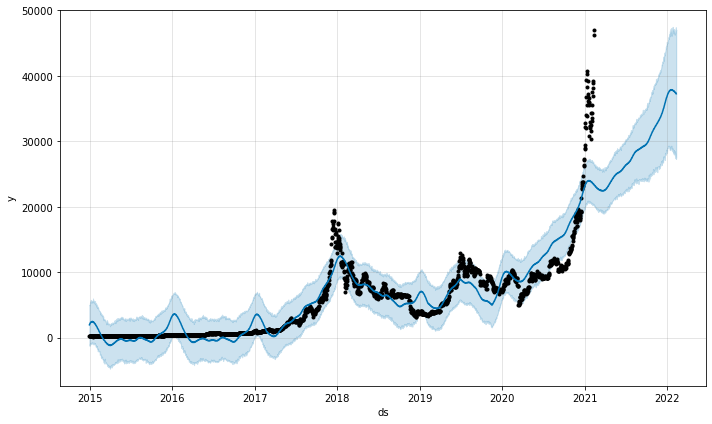

In [27]:
model.plot(forecast)
plt.show()

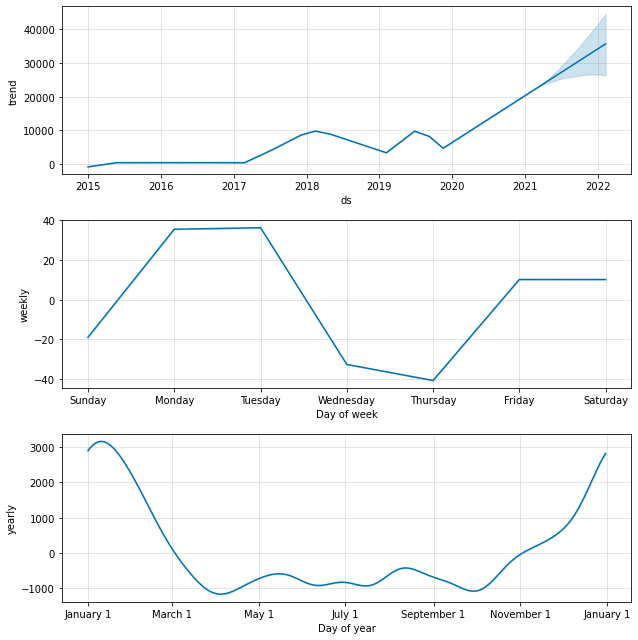

In [28]:
x=model.plot_components(forecast)
plt.show()